## Space X Launch Data Dashboard Lab: Python Script

### Background

In [ ]:
# Assignment instructions https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/lab_theia_plotly_dash.md.html

# Steps to setup development environment
# pip3 install pandas dash
# wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
# following code is a modified version of this skeleton which you can download with
# wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"
# python3 spacex_dash_app.py

### Visuals

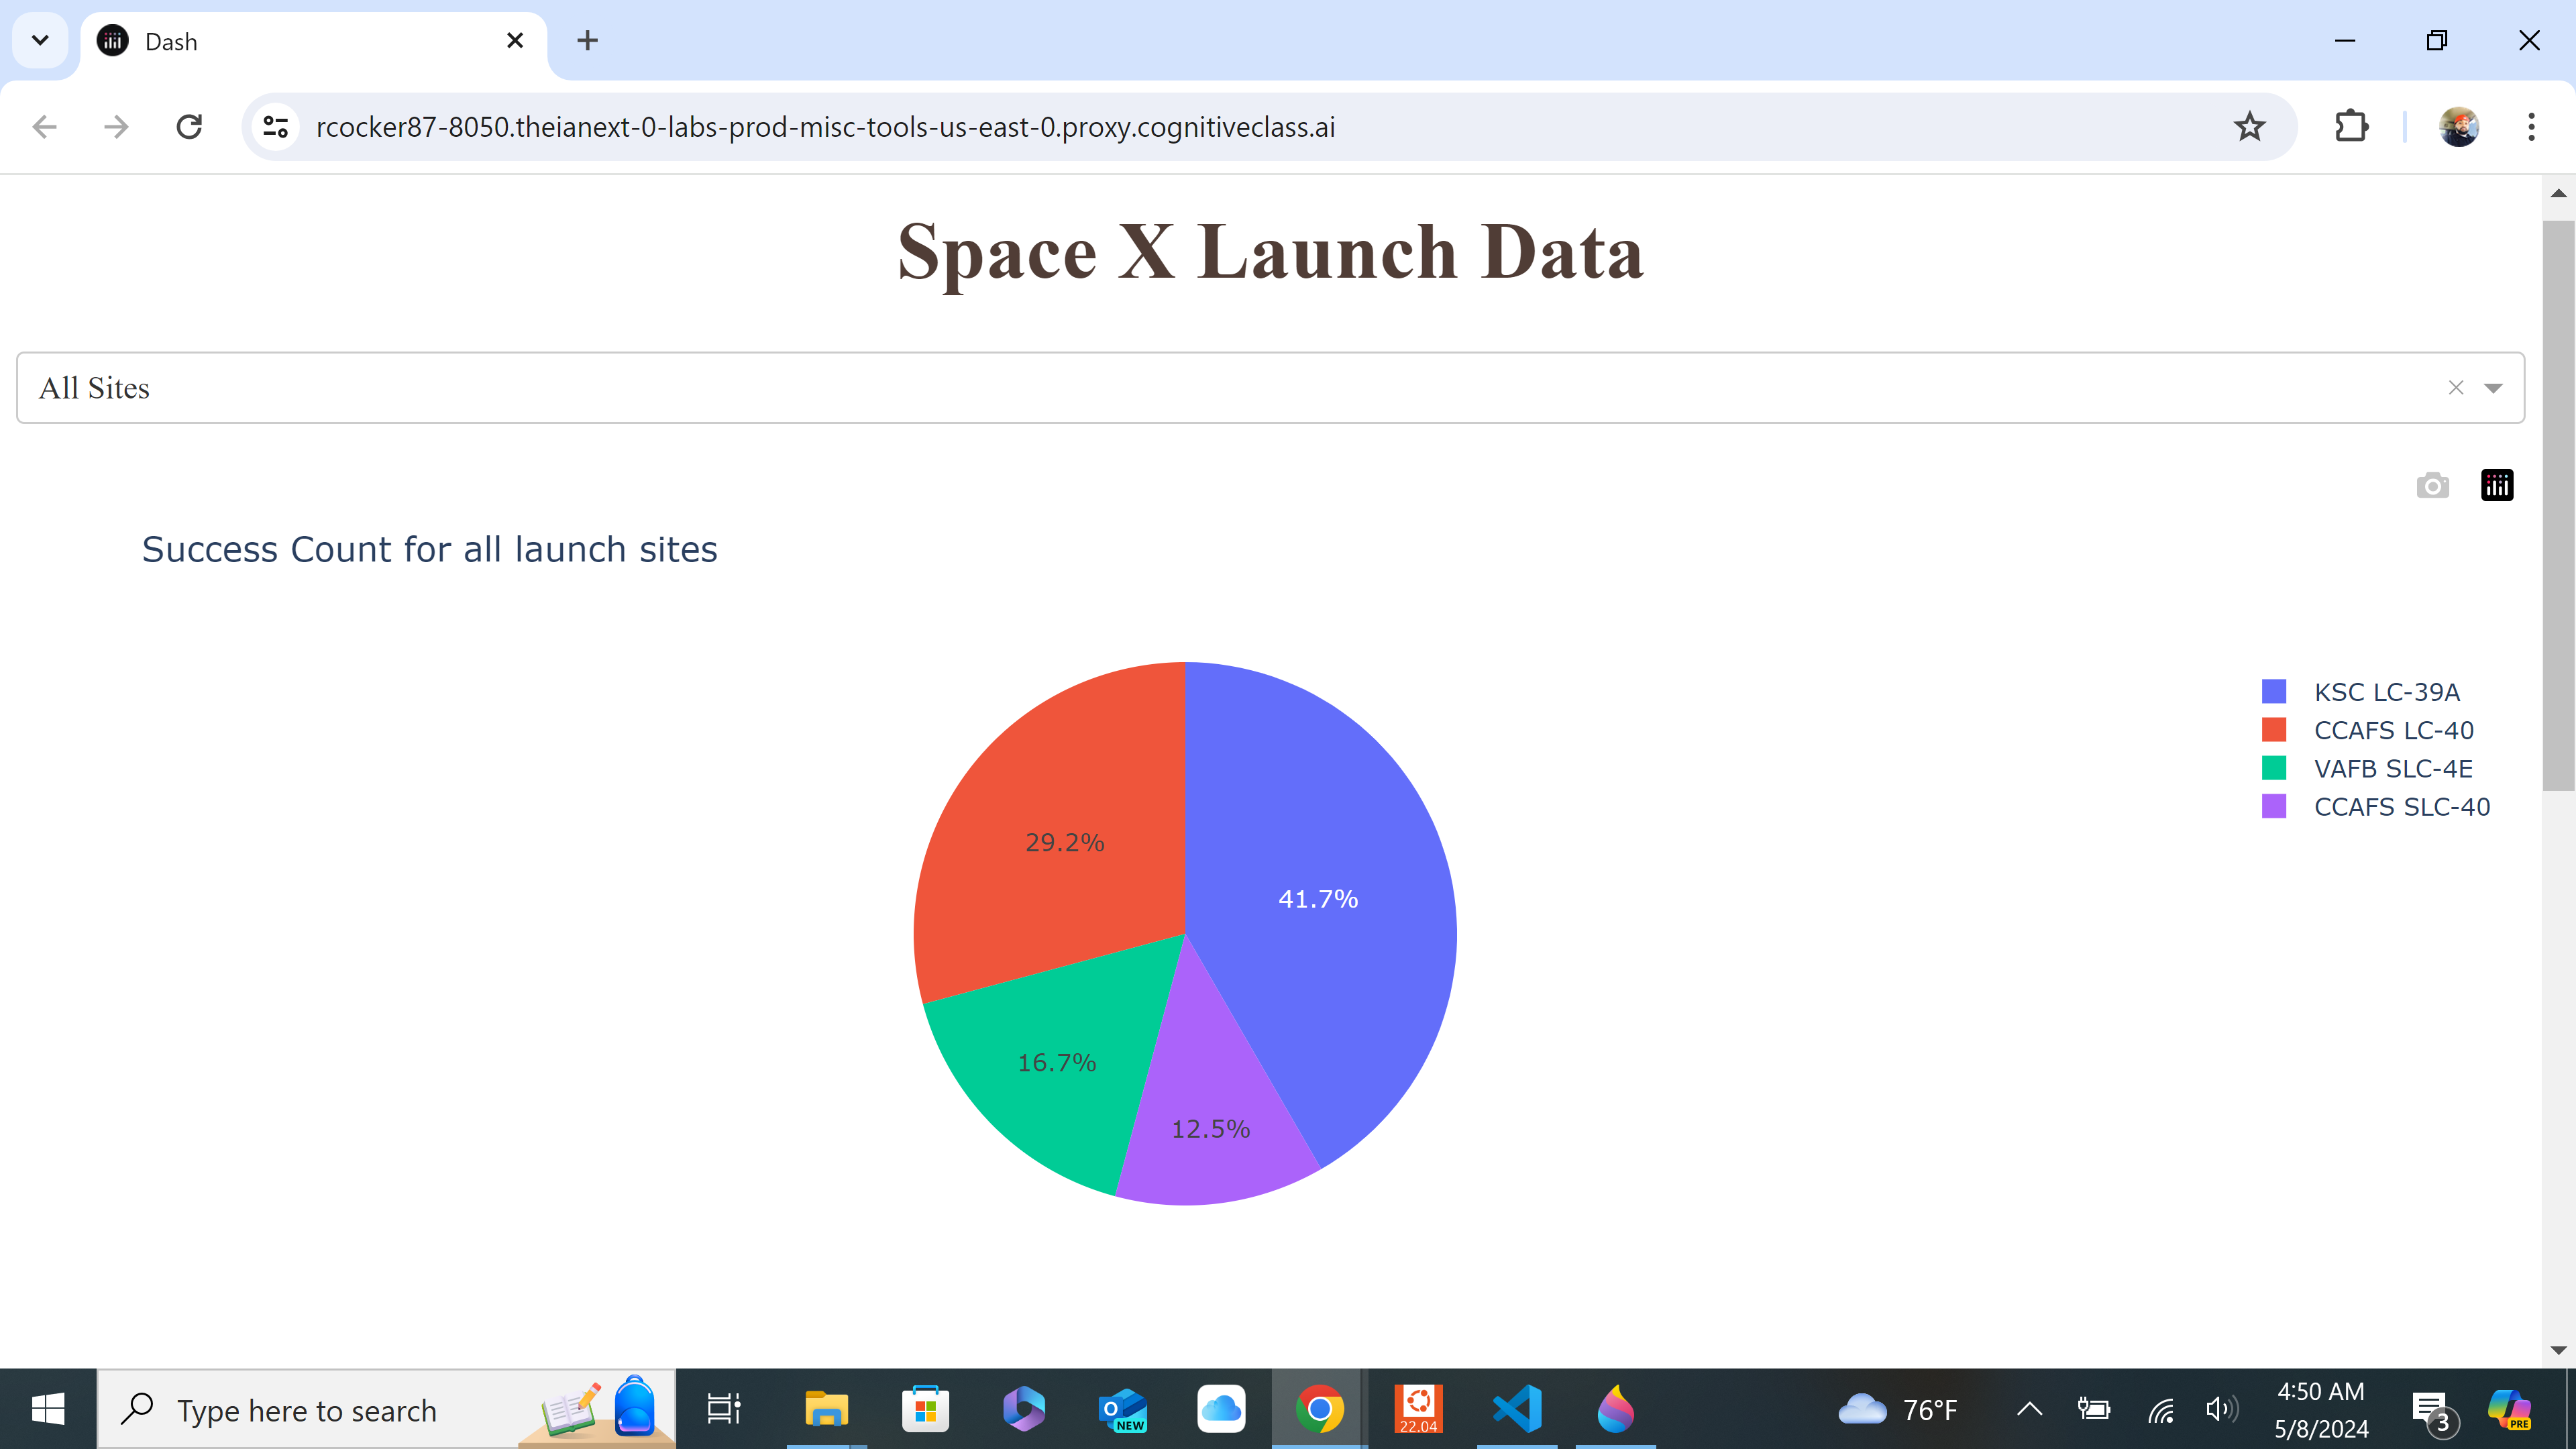

In [12]:
from IPython.display import Image

# Images
Image(filename='Dashboard.png', width=500, height=400)

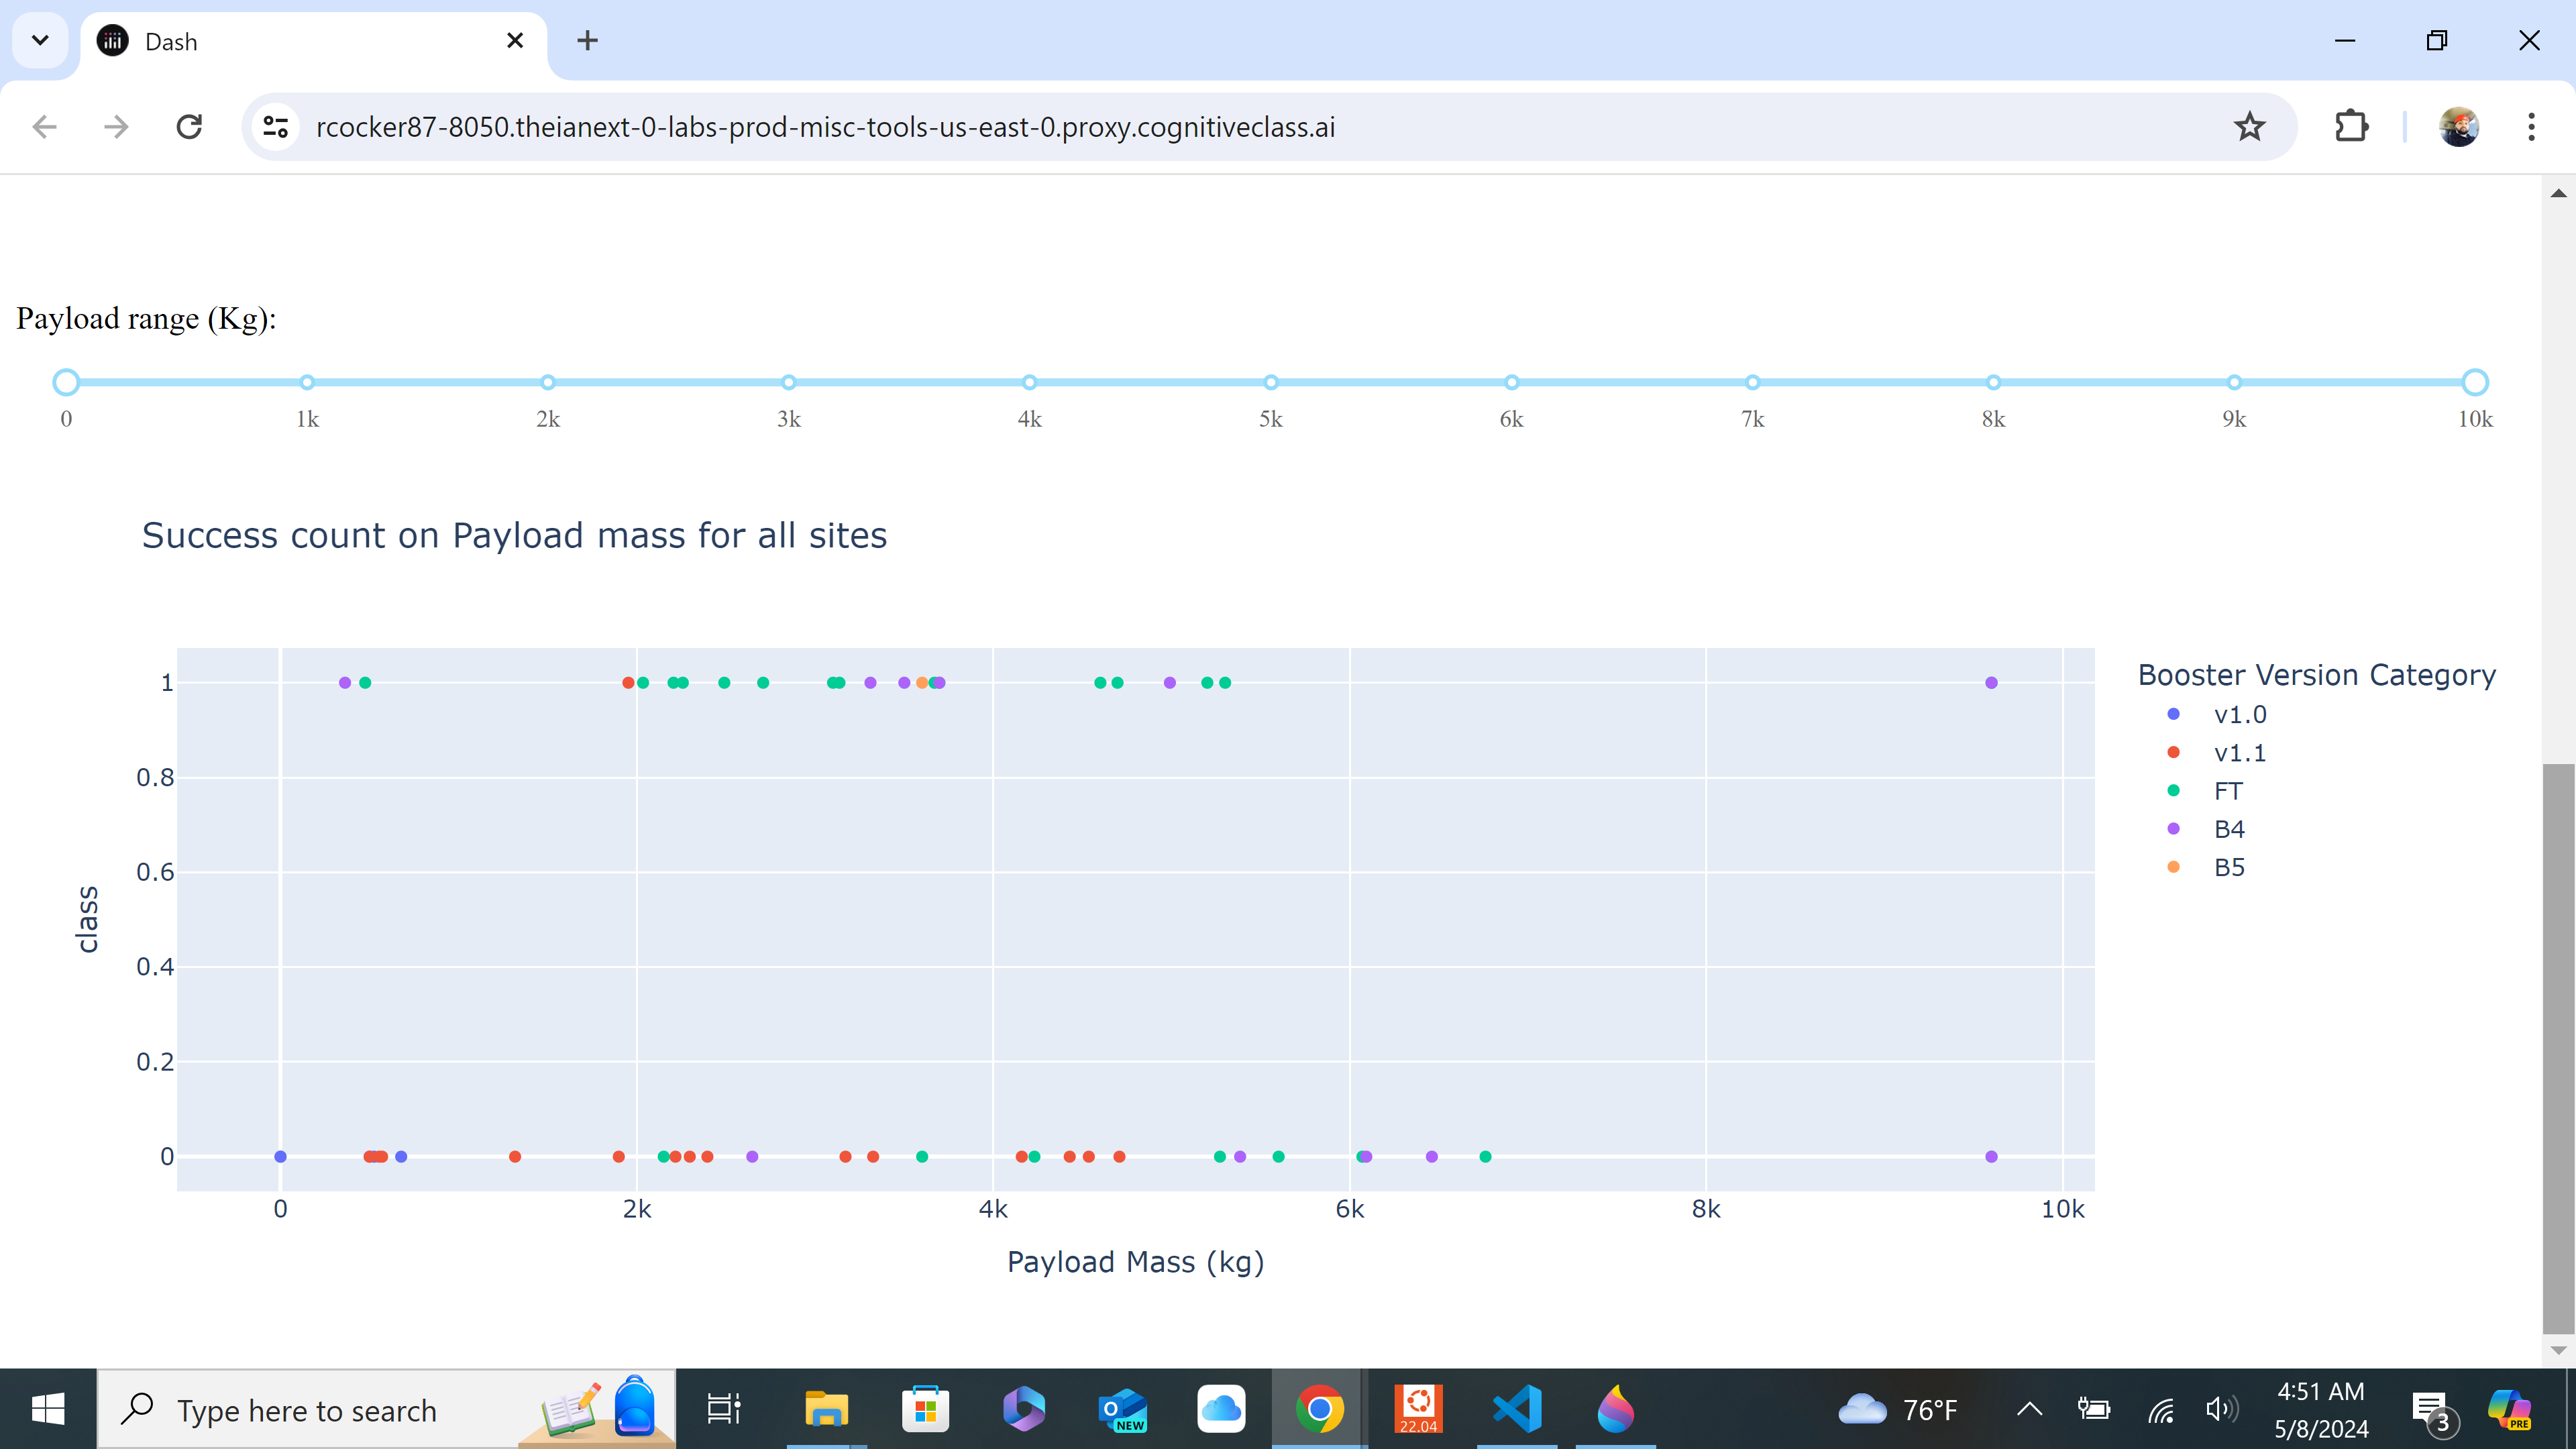

In [13]:
Image(filename='Dashboard 2.png', width=500, height=400)

### Python Script

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('Space X Launch Data',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                             options=[
                                                     {'label': 'All Sites', 'value': 'ALL'},
                                                     {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                     {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                     {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                     {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                                                     ],
                                             value='ALL',
                                             placeholder='Select a Launch Site here',
                                             searchable=True,
                                             # style={'width':'80%','padding':'3px','font-size':'20px','text-align-last':'center'}
                                             ),  
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                                min=0,
                                                max=10000,
                                                step=1000,
                                                value=[min_payload, max_payload]
                                                ),
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Success Count for all launch sites')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df=spacex_df[spacex_df['Launch Site']== entered_site]
        filtered_df=filtered_df.groupby(['Launch Site','class']).size().reset_index(name='class count')
        fig=px.pie(filtered_df,values='class count',names='class',title=f"Total Success Launches for site {entered_site}")
        return fig
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart',component_property='figure'),
                [Input(component_id='site-dropdown',component_property='value'),
                Input(component_id='payload-slider',component_property='value')])
def scatter(entered_site,payload):
    filtered_df = spacex_df[spacex_df['Payload Mass (kg)'].between(payload[0],payload[1])]
    # thought reusing filtered_df may cause issues, but tried it out of curiosity and it seems to be working fine
    
    if entered_site=='ALL':
        fig=px.scatter(filtered_df,x='Payload Mass (kg)',y='class',color='Booster Version Category',title='Success count on Payload mass for all sites')
        return fig
    else:
        fig=px.scatter(filtered_df[filtered_df['Launch Site']==entered_site],x='Payload Mass (kg)',y='class',color='Booster Version Category',title=f"Success count on Payload mass for site {entered_site}")
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()